In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
T = 1000
time = torch.arange(1, T+1, dtype=d2l.float32)
x = torch.sin(0.01*time) + torch.normal(0,0.2,(T,))

In [5]:
x.shape

torch.Size([1000])

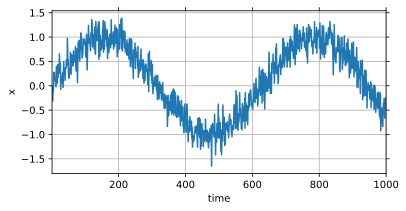

In [6]:
d2l.plot(time,[x],'time','x',xlim=[1,1000],figsize=(6,3))

In [9]:
tau = 4
feature = torch.zeros((T-tau,tau))
for i in range(tau):
    feature[:,i] = x[i:T-tau+i]

In [11]:
feature.shape

torch.Size([996, 4])

In [15]:
labels = x[tau:].reshape(-1,1)

In [16]:
labels.shape

torch.Size([996, 1])

In [17]:
batch_size, n_train = 16,600

In [19]:
train_iter = d2l.load_array((feature[:n_train],labels[:n_train]),batch_size,is_train=True)

In [20]:
next(iter(train_iter))

[tensor([[ 0.5833,  0.5118,  0.4894,  0.5524],
         [ 1.2970,  0.7993,  0.9255,  1.0472],
         [ 0.5635,  0.4151,  0.7162,  0.5833],
         [ 1.1454,  1.1523,  1.0229,  0.9265],
         [-0.9413, -0.8885, -0.8055, -1.0693],
         [-0.9705, -1.1601, -1.1371, -0.8842],
         [-0.8406, -1.0495, -0.8975, -0.5861],
         [-0.8340, -0.5156, -0.1973, -0.4751],
         [ 0.6535,  0.9621,  0.8765,  0.8619],
         [ 0.3990,  0.3058,  0.2912,  0.0566],
         [-1.4131, -0.9073, -1.0887, -1.1334],
         [-0.3966, -0.6409, -0.7624, -0.5891],
         [-0.0092,  0.1855,  0.0860,  0.1198],
         [ 0.7355,  0.6792,  0.7336,  0.6070],
         [ 0.0455,  0.4375, -0.0499, -0.1628],
         [ 0.1121,  0.3635,  0.3818,  0.3623]]),
 tensor([[ 0.5374],
         [ 0.8900],
         [ 0.5118],
         [ 1.0186],
         [-0.8973],
         [-1.0894],
         [-0.9797],
         [-0.6138],
         [ 0.9364],
         [ 0.4363],
         [-0.3958],
         [-0.3712],
      

In [31]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,1))
    net.apply(init_weights)
    return net

loss = nn.MSELoss()

In [32]:
def train(net,train_iter,loss,epochs,lr):
    trainer = torch.optim.Adam(net.parameters(),lr=lr)
    for epoch in range(epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.backward()
            trainer.step()
        print(f'epoch:{epoch+1},train loss:{d2l.evaluate_loss(net,train_iter,loss)}')
    

In [34]:
net = get_net()
train(net,train_iter,loss,10,0.01)

epoch:1,train loss:0.059428324334715545
epoch:2,train loss:0.05001437090533344
epoch:3,train loss:0.04692486614773148
epoch:4,train loss:0.050665369698483696
epoch:5,train loss:0.04479795145361047
epoch:6,train loss:0.05295211919828465
epoch:7,train loss:0.0455801005622274
epoch:8,train loss:0.0445342277617831
epoch:9,train loss:0.04475032528372187
epoch:10,train loss:0.04408714895773875


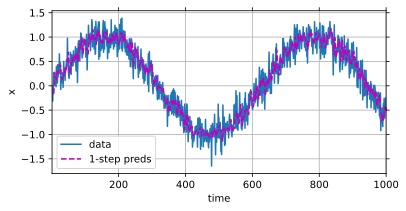

In [36]:
onestep_preds = net(feature)
d2l.plot([time, time[tau:]], [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000], figsize=(6, 3))